## **Will the machine fail?**

Using a synthetic dataset that reflects real predictive maintenance encountered in the industries, this machine learning model using K-Nearest Neighbors algorithm predicts whether a machine failure will occur (1) or not (0).

Two sets of training and testing were done: 
  1. Predicting general machine failure
  2. Predicting specific machine failure
*   Tool wear failure (TWF)
*   Heat dissipation failure (HDF)
*   Power failure (PWF)
*   Overstrain failure (OSF)
*   Random failures (RNF)

For both cases, 97.32% and 97.12% test accuracies were achieved at n=3.

**Data Source:** Matzka, Stephan (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset]. Irvine, CA: University of California, School of Information and Computer Science.

**Relevant Papers:** Stephan Matzka, 'Explainable Artificial Intelligence for Predictive Maintenance Applications', Third International Conference on Artificial Intelligence for Industries (AI4I 2020), 2020 (in press)

In [2]:
!pip install mglearn

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_dir = '/content/drive/My Drive/Colab Notebooks/AI_HW1/'

import os
os.listdir(data_dir)

['SolarPrediction.csv',
 'KAG_energydata_complete.csv',
 'data.csv',
 'covid_sentiments.xlsx',
 'Stars.csv',
 'AI Machine Learning: Homework 1_Stars Class.ipynb',
 'AI Machine Learning: Homework 1_Spotify.ipynb',
 'ai4i2020.csv',
 'AI Machine Learning: Homework 1_Predictive Maintenance.ipynb']

In [29]:
def get_data():
  df_data = pd.read_csv(data_dir+'ai4i2020.csv')
  return df_data

print(len(get_data()))
get_data()

10000


UDI Product ID Type  Air temperature [K]  ...  HDF  PWF  OSF  RNF
0         1     M14860    M                298.1  ...    0    0    0    0
1         2     L47181    L                298.2  ...    0    0    0    0
2         3     L47182    L                298.1  ...    0    0    0    0
3         4     L47183    L                298.2  ...    0    0    0    0
4         5     L47184    L                298.2  ...    0    0    0    0
...     ...        ...  ...                  ...  ...  ...  ...  ...  ...
9995   9996     M24855    M                298.8  ...    0    0    0    0
9996   9997     H39410    H                298.9  ...    0    0    0    0
9997   9998     M24857    M                299.0  ...    0    0    0    0
9998   9999     H39412    H                299.0  ...    0    0    0    0
9999  10000     M24859    M                299.0  ...    0    0    0    0

[10000 rows x 14 columns]

Population per class:      0
0  9954
1    46
Proportion Chance Criterion: 99.08%
1.25 * Proportion Chance Criterion: 123.86%


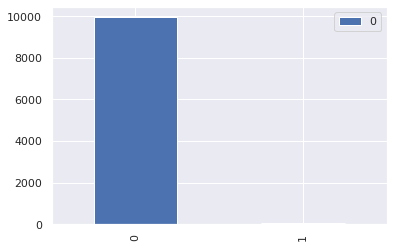

In [32]:
from collections import Counter

def calculate_pcc():
  df = get_data()
  state_counts = Counter(df['TWF'])
  #state_counts = Counter(df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']])
  #state_counts = Counter(df['Machine failure'])
  df_state = pd.DataFrame.from_dict(state_counts, orient='index')
  df_state.plot(kind='bar')

  num=(df_state[0]/df_state[0].sum())**2

  print("Population per class:{}".format(df_state))

  print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
  print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

calculate_pcc()

In [8]:
def split_df():
  df = get_data()

  X = df.drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis = 1)
  y = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

  return X, y

split_df()

(      Air temperature [K]  ...  Machine failure
 0                   298.1  ...                0
 1                   298.2  ...                0
 2                   298.1  ...                0
 3                   298.2  ...                0
 4                   298.2  ...                0
 ...                   ...  ...              ...
 9995                298.8  ...                0
 9996                298.9  ...                0
 9997                299.0  ...                0
 9998                299.0  ...                0
 9999                299.0  ...                0
 
 [10000 rows x 6 columns],       TWF  HDF  PWF  OSF  RNF
 0       0    0    0    0    0
 1       0    0    0    0    0
 2       0    0    0    0    0
 3       0    0    0    0    0
 4       0    0    0    0    0
 ...   ...  ...  ...  ...  ...
 9995    0    0    0    0    0
 9996    0    0    0    0    0
 9997    0    0    0    0    0
 9998    0    0    0    0    0
 9999    0    0    0    0    0
 
 [10000 ro

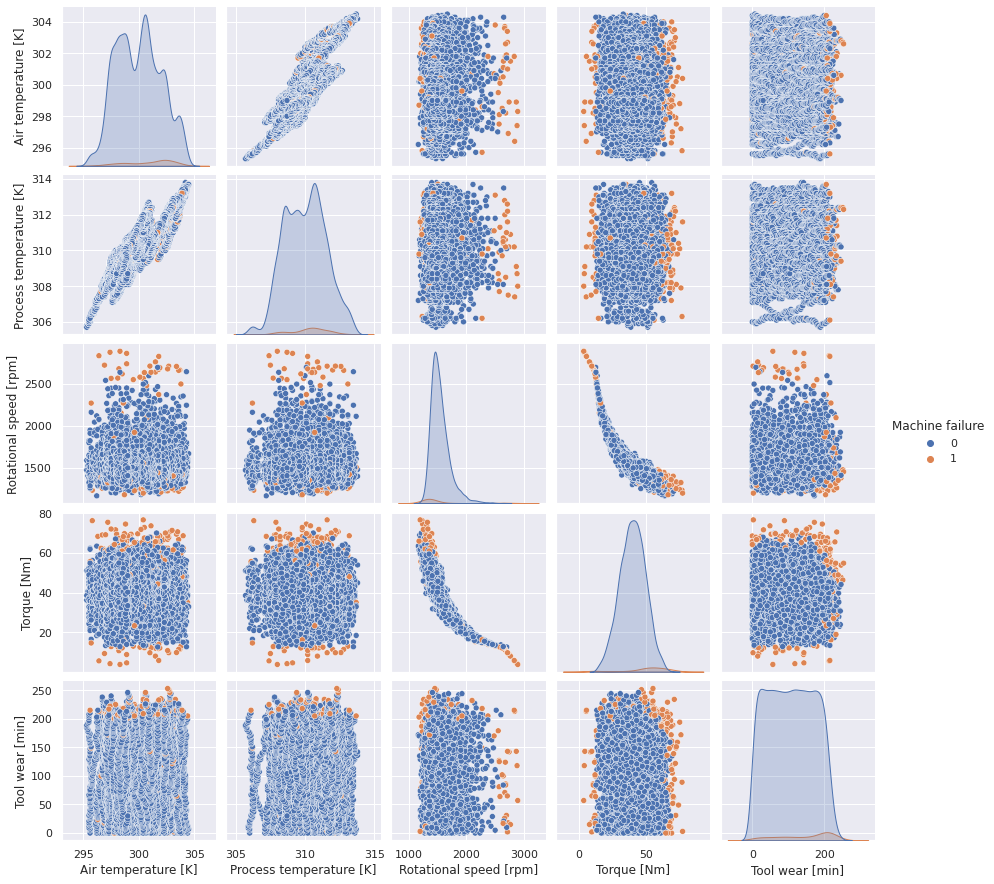

In [35]:
import seaborn as sns

sns.set(style="darkgrid")
df = get_data().drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
fig = sns.pairplot(df, hue='Machine failure')

In [39]:
fig.savefig('gmf.png')

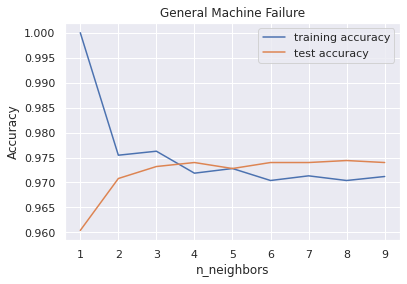

In [22]:
from sklearn.model_selection import train_test_split

df = get_data().drop(['UDI', 'Product ID', 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df,df['Machine failure'], 
                                                    test_size=0.25,random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 10) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.title("General Machine Failure")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

In [11]:
accuracy = {'training accuracy': training_accuracy, 'test accuracy': test_accuracy}
index = neighbors_settings
pd.DataFrame(accuracy, index)


training accuracy  test accuracy
1           1.000000         0.9604
2           0.975467         0.9708
3           0.976267         0.9732
4           0.971867         0.9740
5           0.972800         0.9728
6           0.970400         0.9740
7           0.971333         0.9740
8           0.970400         0.9744
9           0.971200         0.9740

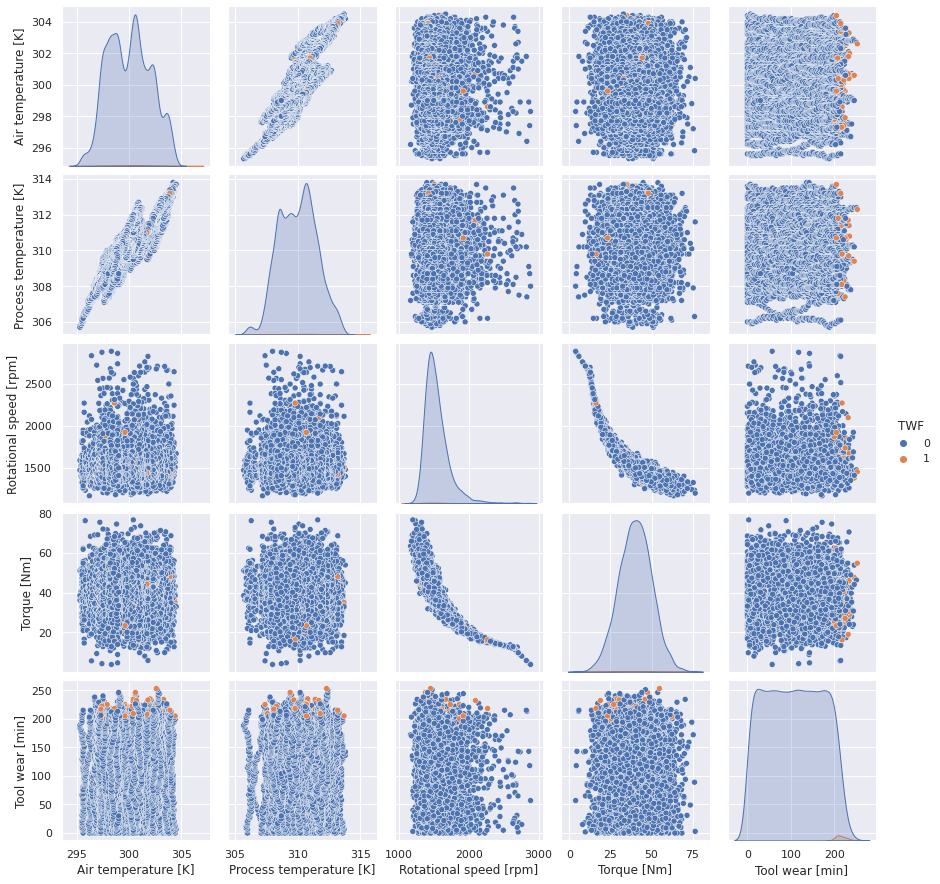

In [17]:
import seaborn as sns

sns.set(style="darkgrid")
df = get_data().drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
sns.pairplot(df, hue='TWF')

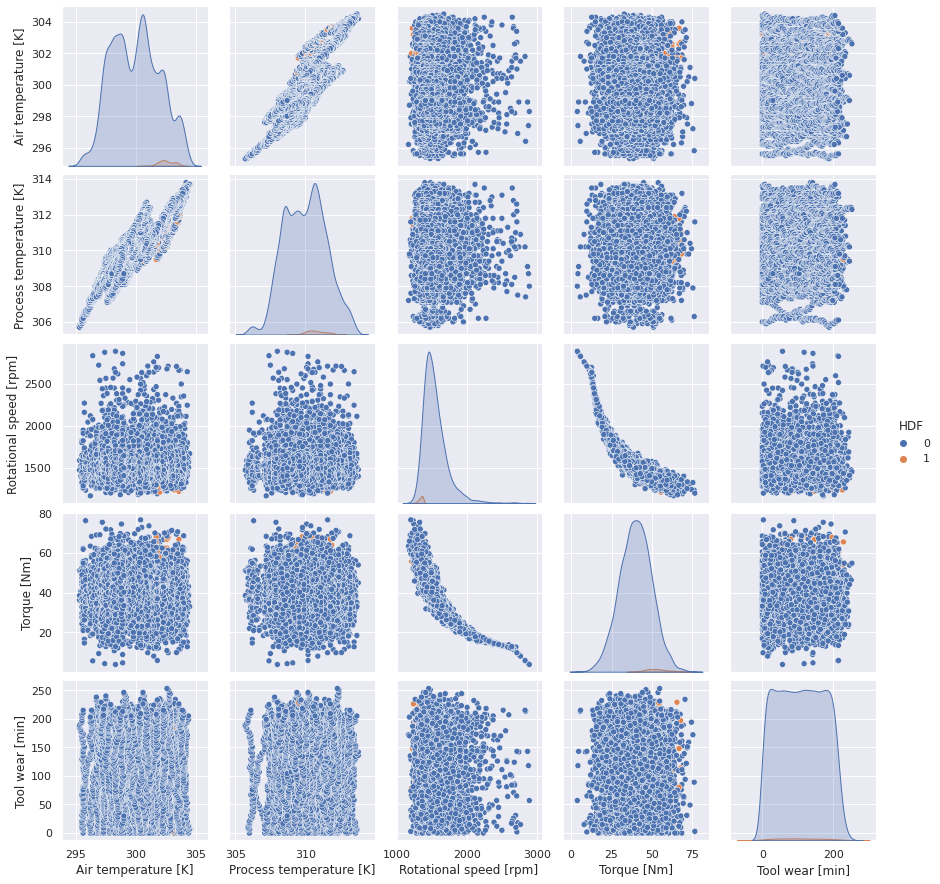

In [18]:
sns.set(style="darkgrid")
df = get_data().drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'PWF', 'OSF', 'RNF'], axis=1)
sns.pairplot(df, hue='HDF')

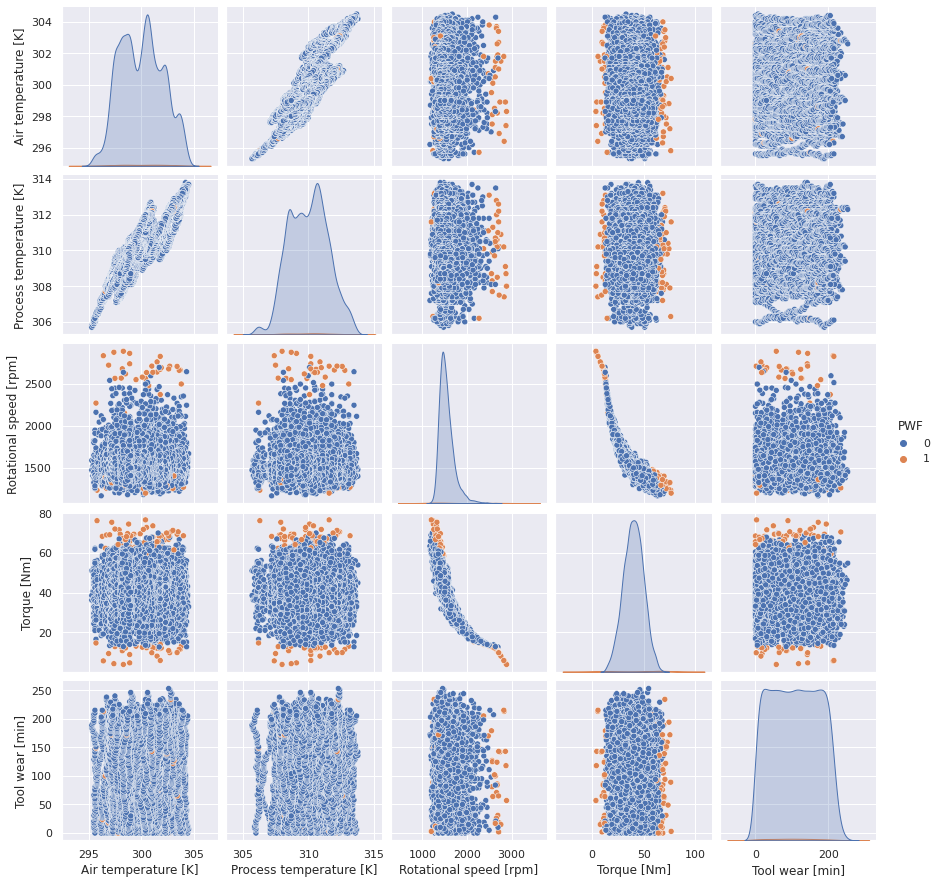

In [19]:
sns.set(style="darkgrid")
df = get_data().drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'OSF', 'RNF'], axis=1)
sns.pairplot(df, hue='PWF')

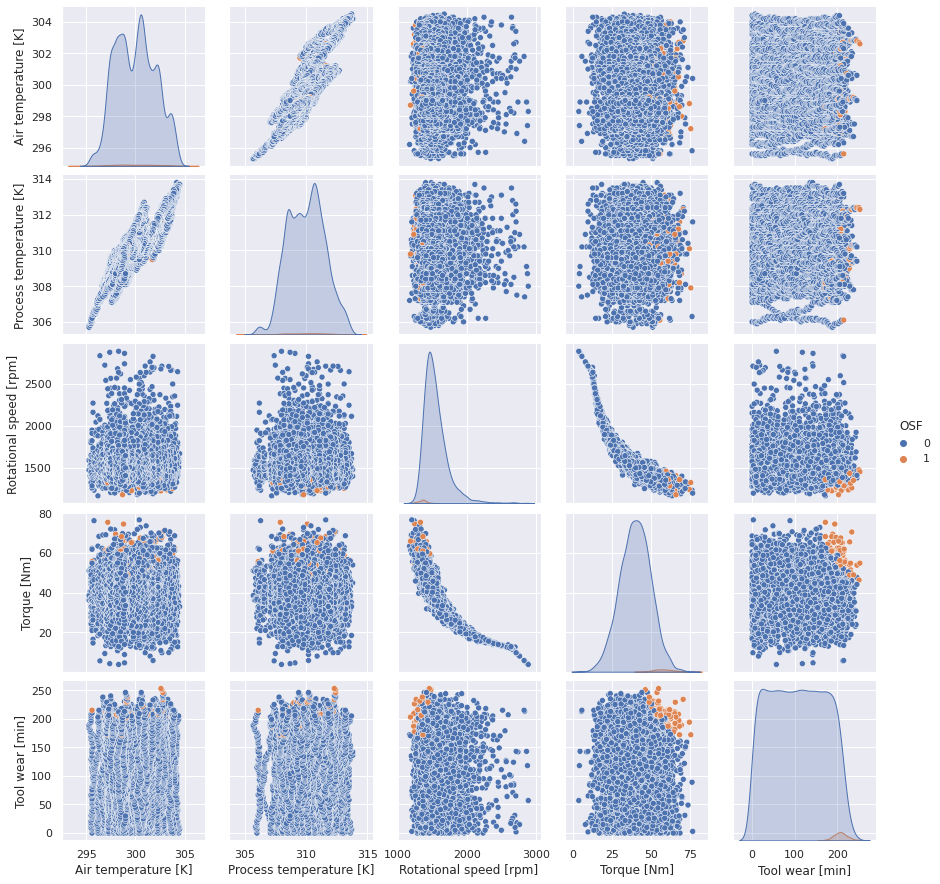

In [20]:
sns.set(style="darkgrid")
df = get_data().drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'RNF'], axis=1)
sns.pairplot(df, hue='OSF')

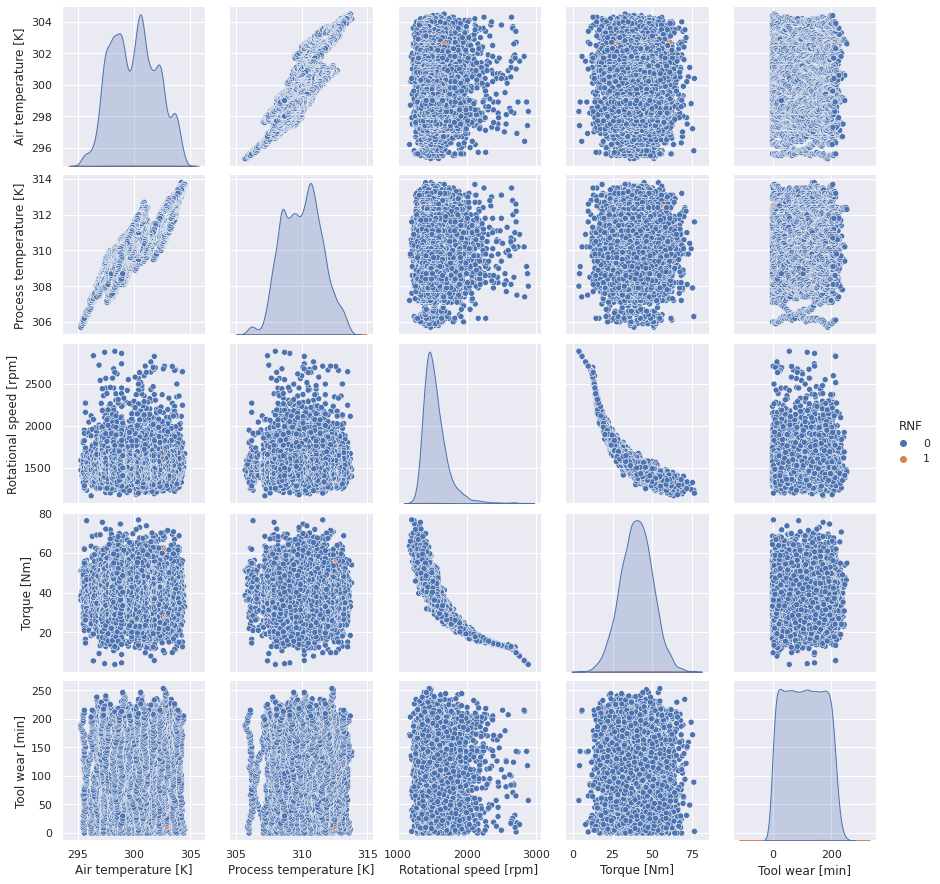

In [21]:
sns.set(style="darkgrid")
df = get_data().drop(['UDI', 'Product ID', 'Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF'], axis=1)
sns.pairplot(df, hue='RNF')

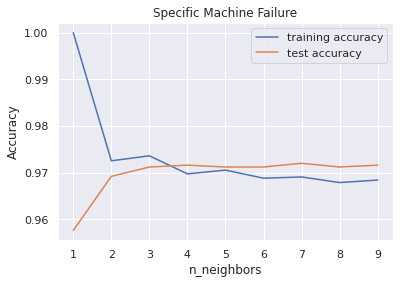

In [23]:
from sklearn.model_selection import train_test_split

df = get_data().drop(['UDI', 'Product ID', 'Type', 'Machine failure'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df,df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']], 
                                                    test_size=0.25,random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 10) # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.title("Specific Machine Failure")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

In [13]:
accuracy = {'training accuracy': training_accuracy, 'test accuracy': test_accuracy}
index = neighbors_settings
pd.DataFrame(accuracy, index)

training accuracy  test accuracy
1           1.000000         0.9576
2           0.972533         0.9692
3           0.973600         0.9712
4           0.969733         0.9716
5           0.970533         0.9712
6           0.968800         0.9712
7           0.969067         0.9720
8           0.967867         0.9712
9           0.968400         0.9716